# EDA & Data Prep

## Load data

In [1]:
import os
import json
import pandas as pd

In [2]:
# Function to read JSON files
def read_json(file_path):
    with open(file_path, 'r') as file:
        data = json.load(file)
    return data

# Function to load data from a directory
def load_data_from_folder(folder_path):
    data = []
    for file_name in os.listdir(folder_path):
        if file_name.endswith('.json'):
            file_path = os.path.join(folder_path, file_name)
            data.append(read_json(file_path))
    return data

In [3]:
# Load data from train, test, and validation folders
train_data = load_data_from_folder('./canonical/train')
test_data = load_data_from_folder('./canonical/test')
val_data = load_data_from_folder('./canonical/dev')

In [4]:
train_data[666]

{'id': 128188,
 'url': 'https://www.liputan6.com/news/read/128188/staf-kedutaan-arab-terjaring-razia-di-puncak',
 'clean_article': [['Liputan6',
   '.',
   'com',
   ',',
   'Puncak',
   ':',
   'Polisi',
   'menemukan',
   'kendaraan',
   'milik',
   'Kedutaan',
   'Besar',
   'Arab',
   'Saudi',
   'di',
   'Indonesia',
   'saat',
   'merazia',
   'sejumlah',
   'vila',
   'di',
   'Puncak',
   ',',
   'Bogor',
   ',',
   'Jawa',
   'Barat',
   ',',
   'Senin',
   '(',
   '28/8',
   ')',
   'dini',
   'hari',
   '.'],
  ['Dalam',
   'operasi',
   'gabungan',
   'di',
   'pagi',
   'buta',
   'ini',
   ',',
   'polisi',
   'juga',
   'mendapati',
   'dua',
   'staf',
   'Kedubes',
   'Arab',
   'Saudi',
   'di',
   'salah',
   'satu',
   'vila',
   '.'],
  ['Razia',
   'bertujuan',
   'mencegah',
   'praktik',
   'kawin',
   'kontrak',
   'yang',
   'selama',
   'ini',
   'marak',
   'di',
   'kawasan',
   'Puncak',
   '[',
   'baca',
   ':',
   'Pelaku',
   'Kawin',
   'Kontrak',
   

## EDA

In [5]:
# Check the existing Columns
base_train_df = pd.DataFrame(train_data)
base_train_df.head()

,id,url,clean_article,clean_summary,extractive_summary
0,228132,https://www.liputan6.com/news/read/228132/nuri...,"[[TIGA, kali, somasi, dilayangkan, kepada, Nur...","[[TIGA, kali, somasi, dilayangkan, kepada, Nur...","[0, 1, 2]"
1,116936,https://www.liputan6.com/news/read/116936/-i-n...,"[[Liputan6, ., com, ,, Jakarta, :, Earth, Wind...","[[Setelah, di, Bandung, ,, Earth, Wind, and, F...","[1, 6]"
2,57896,https://www.liputan6.com/news/read/57896/sebua...,"[[Liputan6, ., com, ,, Jakarta, :, Belasan, un...","[[Lokasi, kebakaran, di, rumah, bernomor, semb...","[4, 7]"
3,203262,https://www.liputan6.com/news/read/203262/ball...,"[[Empat, tahun, silam, ,, Ballack, terpaksa, d...","[[Dua, kali, Michael, Ballack, berjuang, di, P...","[0, 2, 22, 7]"
4,66332,https://www.liputan6.com/news/read/66332/anggo...,"[[Liputan6, ., com, ,, Bandung, :, Ruthini, ,,...","[[Sekitar, 260-an, pengikut, Mangapin, Sibuea,...","[6, 19]"


In [6]:
pd.set_option('max_colwidth', 800)

base_train_df.head()

,id,url,clean_article,clean_summary,extractive_summary
0,228132,https://www.liputan6.com/news/read/228132/nuri-shaden-dilaporkan-ke-polisi,"[[TIGA, kali, somasi, dilayangkan, kepada, Nuri, Shaden, .], [Namun, reaksi, yang, diharapkan, agar, meminta, maaf, hasilnya, nihil, .], [Keluarga, Janu, Utomo, melaporkan, kasus, kecelakaan, di, Jalan, Sisingamaraja, ,, Jakarta, Selatan, ,, 1, Juni, silam, itu, ke, Kepolisian, Resor, Metro, Jaksel, .], ["", Kita, melaporkan, atas, dugaan, tindak, pidana, ,, "", tutur, Taufik, Basari, ,, kuasa, hukum, keluarga, Janu, ,, belum, lama, ini, .], [Taufik, menambahkan, ,, pihaknya, ingin, Nuri, mencabut, pernyataan, di, depan, pers, ,, 2, Juni, silam, .], [Ia, juga, ingin, Nuri, meminta, maaf, di, media, atas, kejadian, itu, .], [Dan, juga, menyampaikan, belasungkawa, .], [Taufik, menilai, ,, pernyataan, Nuri, memutarbalikkan, fakta, .], ["", Yang, kita, adukan, soal, pernyataan-pernyataannya, ...","[[TIGA, kali, somasi, dilayangkan, kepada, Nuri, Shaden, .], [Namun, reaksi, yang, diharapkan, agar, meminta, maaf, hasilnya, nihil, .], [Keluarga, Janu, Utomo, pun, melaporkan, Nuri, ke, Kepolisian, Resor, Metro, Jakarta, Selatan, .]]","[0, 1, 2]"
1,116936,https://www.liputan6.com/news/read/116936/-i-nge--i--jazz--i-bareng--i--earth-wind-and-fire,"[[Liputan6, ., com, ,, Jakarta, :, Earth, Wind, and, Fire, Experience, Worldwide, Tour, 2006, Featuring, Al, Mckay, All, Star, sukses, memuaskan, penikmat, jazz, yang, memadati, Grand, Melia, ,, Jakarta, Selatan, ,, Rabu, (, 1/2, ), malam, .], [Pertunjukan, ini, adalah, penampilan, kedua, dari, rangkaian, tur, grup, asal, Chicago, ,, Amerika, Serikat, itu, di, enam, kota, besar, di, Indonesia, .], [Setelah, Jakarta, dan, Bandung, ,, mereka, siap, menggoyang, Semarang, ,, Yogyakarta, ,, Surabaya, ,, dan, Medan, .], [Tembang, Serpentine, Fire, menjadi, lagu, pembuka, Earth, Wind, and, Fire, .], [Dengan, energik, ,, trio, vokal, Tim, Owens, ,, Claude, Woods, ,, dan, Devere, Duckett, berhasil, memukau, penonton, .], [Diiringi, Al, Mckay, All, Star, ,, mereka, terus, mendendangkan, hits, an...","[[Setelah, di, Bandung, ,, Earth, Wind, and, Fire, giliran, menghibur, penikmat, jazz, di, Jakarta, ,, tadi, malam, .], [Lagu-lagu, andalan, grup, asal, Chicago, itu, mampu, menyihir, penonton, sampai, detik, terakhir, pertunjukan, .]]","[1, 6]"
2,57896,https://www.liputan6.com/news/read/57896/sebuah-rumah-di-patra-kuningan-terbakar,"[[Liputan6, ., com, ,, Jakarta, :, Belasan, unit, mobil, pemadam, kebakaran, dikerahkan, untuk, menjinakkan, amukan, si, jago, merah, di, sebuah, rumah, di, kawasan, Perumahan, Patra, Kuningan, ,, Jakarta, Selatan, ,, Ahad, (, 6/7, ), sore, .], [Petugas, pemadam, juga, membuka, paksa, bagian, tengah, rumah, bernomor, sembilan, itu, untuk, menyelamatkan, isi, hunian, di, Kompleks, Perumahan, Pertamina, tersebut, .], [Puluhan, petugas, pemadam, disebar, ke, beberapa, tempat, untuk, mencegah, meluasnya, kobaran, api, yang, mulai, menyala, sekitar, pukul, 17, ., 00, WIB, .], [Beberapa, warga, sekitar, mengatakan, ,, bangunan, yang, selama, ini, berfungsi, sebagai, tempat, istirahat, petugas, kebersihan, itu, ,, pada, malam, hari, biasanya, dijadikan, tempat, mangkal, sejumlah, pemuda, .], ...","[[Lokasi, kebakaran, di, rumah, bernomor, sembilan, di, Perumahan, Patra, Kuningan, ,, Jaksel, ,, ini, hanya, berjarak, puluhan, meter, dari, kediaman, mantan, Presiden, Habibie, .], [Jumlah, kerugian, belum, diketahui, .]]","[4, 7]"
3,203262,https://www.liputan6.com/news/read/203262/ballack-ratapi-nasib,"[[Empat, tahun, silam, ,, Ballack, terpaksa, duduk, di, bangku, cadangan, ketika, Jerman, berjuang, menahan, gempuran, Ronaldo, dkk, di, babak, final, PD, 2002, di, Jepang-Korea, .], [Akumulasi, kartu, kuning, membuat, playmaker, Jerman, itu, harus, menitikkan, air, mata, menyaksikan, Oliver, Kahn, dkk, berjuang, “, sendirian, ”, .], [Kini, ,, di, kandang, sendiri, ,, air, mata, kembali, menggenang, di, pipi, Ballack, ,, setelah, hanya, dalam, dua, meni

### Column Removal
It seems like wee need only the "clean_article" and "clean_summary".
The next job is to append the array for each column

In [7]:
# Function to extract articles and summaries from the data(omit url and extractive index)
def extract_articles_and_summaries(data):
    articles = [" ".join(sum(item['clean_article'], [])) for item in data]
    summaries = [" ".join(sum(item['clean_summary'], [])) for item in data]
    return articles, summaries

In [8]:
# Extract articles and summaries
train_articles, train_summaries = extract_articles_and_summaries(train_data)
test_articles, test_summaries = extract_articles_and_summaries(test_data)
val_articles, val_summaries = extract_articles_and_summaries(val_data)

In [9]:
# Create DataFrames
train_df = pd.DataFrame({'article': train_articles, 'summary': train_summaries})
test_df = pd.DataFrame({'article': test_articles, 'summary': test_summaries})
val_df = pd.DataFrame({'article': val_articles, 'summary': val_summaries})

#### See The combined data sets and the number of records given

In [10]:
# see train df that has been combined and the count of
train_df.describe()

,article,summary
count,193883,193883
unique,193012,192775
top,"Liputan6 . com , Jakarta : Di hari perdagangan terakhir bulan Juli ini ( 30/7 ) , bursa Jepang dibuka pada teritori negative . Outlook yang buruk dari perusahaan-perusahaan teknologi AS , dan komentar Federal Reserve ( Fed ) yang mengecilkan hati , kembali menimbulkan awan hitam mengenai kemungkinan terhantamnya pemulihan ekonomi di AS . Pada perdagangan pagi hari ini indeks Nikkei spot turun sebesar 52 . 10 poin ( 0 . 6% ) di posisi 9643 . 23 poin . Sementara indeks berjangka Nikkei 225 untuk kontrak Desember meningkat sebesar 55 poin . Indeks berjangka dibuka pada posisi 9 . 640 poin namun telah mengalami pergerakan melemah ke posisi 9 . 560 poin . Topix turun 0 . 4% di posisi 857 . 47 poin . Pergerakan saham bervariasi . Sony Corp naik cukup tajam meskipun sentimen secara umum melem...","Jumat ( 7/9 ) , genap tiga tahun kematian aktivis hak asasi manusia Munir . Untuk menyambut momen tersebut , Liputan6 . com menurunkan empat tulisan terkait perjalanan hidup Munir dan kematiannya ."
freq,3,4


In [11]:
# see train df that has been combined
test_df.describe()

,article,summary
count,10972,10972
unique,10970,10967
top,"Liputan6 . com , Medan : Menteri Koordinator Bidang Kesejahteraan Rakyat Jusuf Kalla menjanjikan penanganan pengungsi Aceh selesai ditangani paling lambat akhir tahun ini . Soalnya , dana untuk memindahkan pengungsi tersebut ke lokasi lain sudah tersedia . Hal itu diungkapkan Menko Kesra di Medan , Sumatra Utara , baru-baru ini . Kendati demikian , Jusuf enggan menyebutkan jumlah dana relokasi pengungsi tersebut . Jusuf mengungkapkan , jumlah pengungsi Aceh di Sumut , mencapai 50 ribu orang dan tersebar di tujuh daerah tingkat dua . Untuk mengatasinya , pemerintah bakal segera memindahkannya ke daerah lain atau mengembalikannya ke daerah asal jika situasinya memungkinkan . Bila tidak , ia mengkhawatirkan persoalannya kian berlarut-larut , bahkan dapat menimbulkan gejolak sosial . ( ANS...","Sejak sepekan terakhir , Pemko Batam mulai memberlakukan pengendalian penduduk . Sebanyak 275 pencari kerja asal Jawa dan Sumatra dipulangkan karena tak memiliki KTP Batam ."
freq,2,2


In [12]:
# see train df that has been combined
val_df.describe()

,article,summary
count,10972,10972
unique,10961,10958
top,"Liputan6 . com , Jakarta : Di masyarakat , televisi kerap dipandang ikut membantu terpicunya konflik , memperbesar pertikaian , sekaligus menjual kesengsaraan untuk kepentingan bisnis . Di sisi lain , televisi juga bisa berperan dalam pendidikan politik dan pendidikan hukum , plus kontrol sosial . Setidaknya , itulah inti persoalan yang berhasil dijaring Tim Liputan 6 SCTV dalam road show Liputan 6 di lima kota besar di Jawa , beberapa waktu silam . Untuk bisa menyimak persoalan tersebut lebih jauh , liputan6 . com membagi dalam empat segmen video : Pertama , peran televisi dalam peningkatan kesadaran hukum . Kedua , peran televisi dalam kontrol sosial . Ketiga peran televisi dalam pendidikan politik . Terakhir , jurnalisme Liputan 6 dalam gerakan reformasi . ( RSB/Bayu Setiono ) .","Sejumlah pemuka blok dan pegawai LP Cipinang sepakat untuk menjamin keamanan Tommy Soeharto . Karena itu , Nudirman Munir diharapkan segera menyerahkan kliennya ."
freq,4,2


In [13]:
print(train_df.loc[666, "article"])
print(train_df.loc[666, "summary"])

Liputan6 . com , Puncak : Polisi menemukan kendaraan milik Kedutaan Besar Arab Saudi di Indonesia saat merazia sejumlah vila di Puncak , Bogor , Jawa Barat , Senin ( 28/8 ) dini hari . Dalam operasi gabungan di pagi buta ini , polisi juga mendapati dua staf Kedubes Arab Saudi di salah satu vila . Razia bertujuan mencegah praktik kawin kontrak yang selama ini marak di kawasan Puncak [ baca : Pelaku Kawin Kontrak Asal Arab Saudi Dibekuk ] . Pihak Kedubes Arab Saudi mengakui kendaraan itu memang dipakai dua stafnya untuk berlibur akhir pekan . Namun , kedutaan membantah keterlibatan stafnya dalam praktik kawin kontrak . Alhasil , kedua pria yang mengendarai mobil kedutaan itu tak ditahan polisi . Dalam kendaraan korps diplomatik itu , polisi menemukan paspor yang sudah habis masa berlaku . Sedangkan tiga warga negara Arab diciduk karena masa berlaku paspor mereka telah habis . Di sisi salah satu vila di wilayah dingin ini , polisi menemukan tiga perempuan yang bersembunyi . Mereka menyang

### Word count for each column

In [14]:
def word_count(sentence):
    sentences = sentence.split()
    return len(sentences)

In [15]:
train_df['num_words_article'] = train_df['article'].apply(word_count)
train_df['num_words_summary'] = train_df['summary'].apply(word_count)
train_df.describe()

,num_words_article,num_words_summary
count,193883.000000,193883.000000
mean,234.065999,30.985166
std,139.050558,7.580206
min,35.000000,12.000000
25%,149.000000,27.000000
50%,197.000000,30.000000
75%,277.000000,34.000000
max,7379.000000,102.000000


### Plotting the Distribution of Number of Words

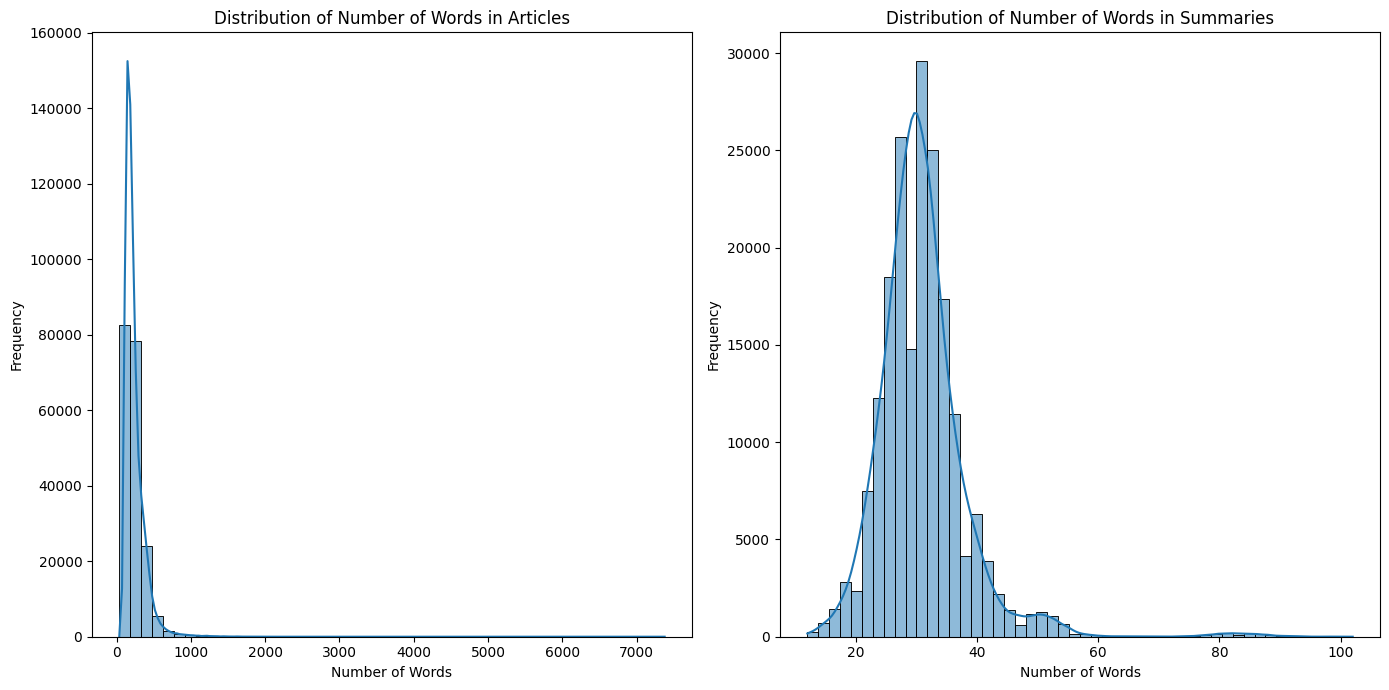

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_distribution(df):
    fig, axes = plt.subplots(1, 2, figsize=(14, 7))
    
    sns.histplot(df['num_words_article'], bins=50, ax=axes[0], kde=True)
    axes[0].set_title('Distribution of Number of Words in Articles')
    axes[0].set_xlabel('Number of Words')
    axes[0].set_ylabel('Frequency')

    sns.histplot(df['num_words_summary'], bins=50, ax=axes[1], kde=True)
    axes[1].set_title('Distribution of Number of Words in Summaries')
    axes[1].set_xlabel('Number of Words')
    axes[1].set_ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()

plot_distribution(train_df)

### Uni-gram & Bi-gram

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/shabiras/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/shabiras/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
/opt/anaconda3/envs/pr_2_venv/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:406: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['baiknya', 'berkali', 'kali', 'kurangnya', 'mata', 'olah', 'sekurang', 'setidak', 'tama', 'tidaknya'] not in stop_words.
  warnings.warn(
/var/folders/sf/f6mp34nd5vl3m3wt1sk575br0000gn/T/ipykernel_1840/787357242.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='ngram', data=ngram_df, palette='viridis')


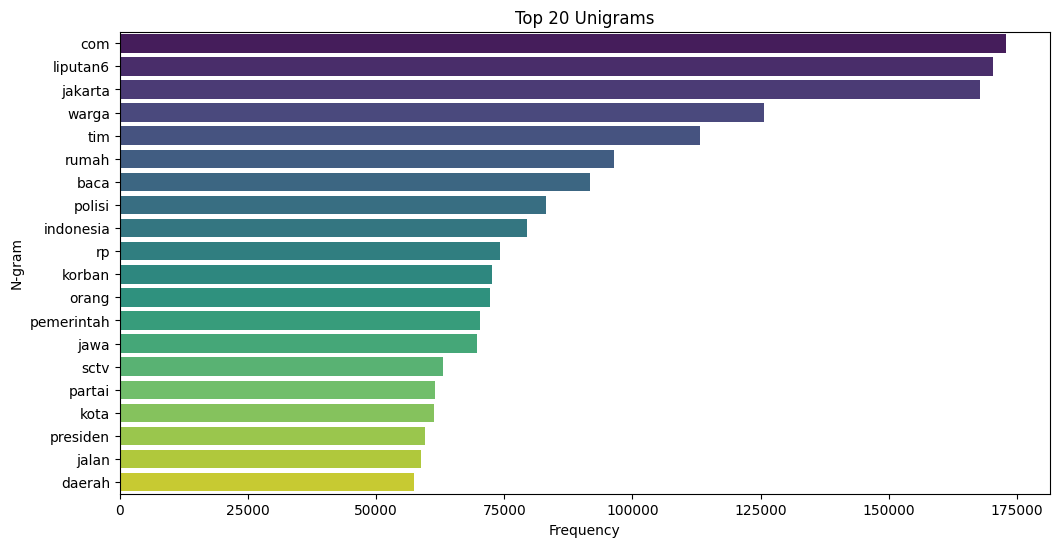

/opt/anaconda3/envs/pr_2_venv/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:406: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['baiknya', 'berkali', 'kali', 'kurangnya', 'mata', 'olah', 'sekurang', 'setidak', 'tama', 'tidaknya'] not in stop_words.
  warnings.warn(
/var/folders/sf/f6mp34nd5vl3m3wt1sk575br0000gn/T/ipykernel_1840/787357242.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='ngram', data=ngram_df, palette='viridis')


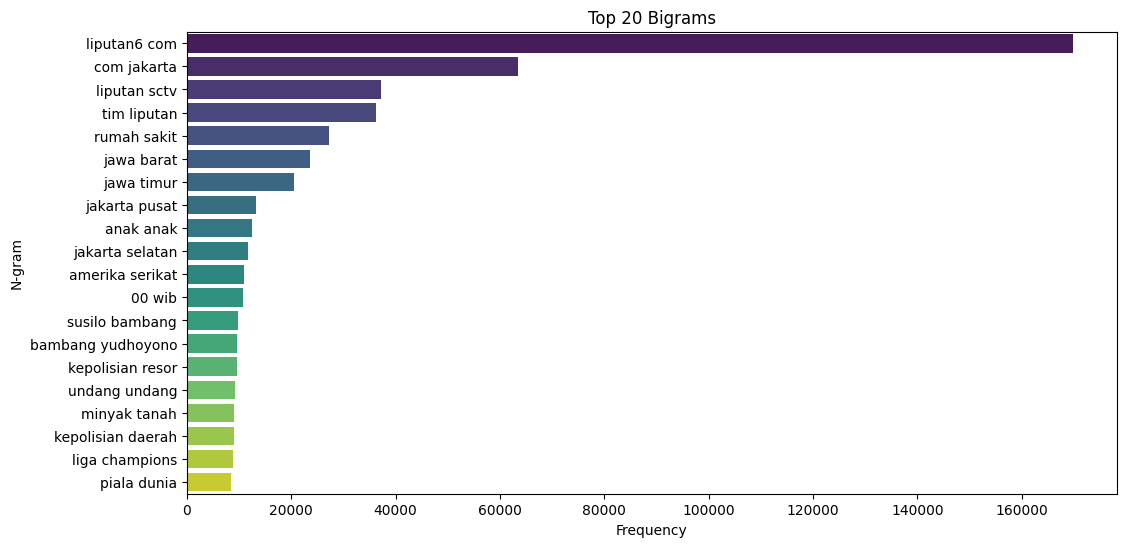

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
import nltk

# Ensure you have the necessary NLTK data files
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords

# Indonesian stopwords
stop_words = stopwords.words('indonesian')

def plot_top_ngrams(corpus, n=1, num_ngrams=20):
    vectorizer = CountVectorizer(ngram_range=(n, n), stop_words=stop_words).fit(corpus)
    ngrams = vectorizer.transform(corpus)
    sum_ngrams = ngrams.sum(axis=0)
    ngram_freq = [(ngram, sum_ngrams[0, idx]) for ngram, idx in vectorizer.vocabulary_.items()]
    ngram_freq = sorted(ngram_freq, key=lambda x: x[1], reverse=True)[:num_ngrams]

    ngram_df = pd.DataFrame(ngram_freq, columns=['ngram', 'count'])

    plt.figure(figsize=(12, 6))
    sns.barplot(x='count', y='ngram', data=ngram_df, palette='viridis')
    plt.title(f'Top {num_ngrams} {"Unigrams" if n == 1 else "Bigrams"}')
    plt.xlabel('Frequency')
    plt.ylabel('N-gram')
    plt.show()

def analyze_text(corpus):
    # Unigrams
    plot_top_ngrams(corpus, n=1, num_ngrams=20)
    # Bigrams
    plot_top_ngrams(corpus, n=2, num_ngrams=20)


temp_train_df = train_df
corpus = temp_train_df['article'].astype(str).tolist()
analyze_text(corpus)

## Data pre-processing

#### Getrid of num words article and num words summary

In [18]:
train_df.head()

,article,summary,num_words_article,num_words_summary
0,"TIGA kali somasi dilayangkan kepada Nuri Shaden . Namun reaksi yang diharapkan agar meminta maaf hasilnya nihil . Keluarga Janu Utomo melaporkan kasus kecelakaan di Jalan Sisingamaraja , Jakarta Selatan , 1 Juni silam itu ke Kepolisian Resor Metro Jaksel . "" Kita melaporkan atas dugaan tindak pidana , "" tutur Taufik Basari , kuasa hukum keluarga Janu , belum lama ini . Taufik menambahkan , pihaknya ingin Nuri mencabut pernyataan di depan pers , 2 Juni silam . Ia juga ingin Nuri meminta maaf di media atas kejadian itu . Dan juga menyampaikan belasungkawa . Taufik menilai , pernyataan Nuri memutarbalikkan fakta . "" Yang kita adukan soal pernyataan-pernyataannya , "" ujar dia . Keluarga Janu melaporkan dengan dua tuduhan . Yakni sikap yang tidak menyenangkan dan pencemaran nama baik . Kala...",TIGA kali somasi dilayangkan kepada Nuri Shaden . Namun reaksi yang diharapkan agar meminta maaf hasilnya nihil . Keluarga Janu Utomo pun melaporkan Nuri ke Kepolisian Resor Metro Jakarta Selatan .,278,31
1,"Liputan6 . com , Jakarta : Earth Wind and Fire Experience Worldwide Tour 2006 Featuring Al Mckay All Star sukses memuaskan penikmat jazz yang memadati Grand Melia , Jakarta Selatan , Rabu ( 1/2 ) malam . Pertunjukan ini adalah penampilan kedua dari rangkaian tur grup asal Chicago , Amerika Serikat itu di enam kota besar di Indonesia . Setelah Jakarta dan Bandung , mereka siap menggoyang Semarang , Yogyakarta , Surabaya , dan Medan . Tembang Serpentine Fire menjadi lagu pembuka Earth Wind and Fire . Dengan energik , trio vokal Tim Owens , Claude Woods , dan Devere Duckett berhasil memukau penonton . Diiringi Al Mckay All Star , mereka terus mendendangkan hits andalan , antara lain Pride dan Gotta Get You Into My Life . Meski Earth Wind and Fire terbilang grup lawas , tembang mereka teta...","Setelah di Bandung , Earth Wind and Fire giliran menghibur penikmat jazz di Jakarta , tadi malam . Lagu-lagu andalan grup asal Chicago itu mampu menyihir penonton sampai detik terakhir pertunjukan .",160,32
2,"Liputan6 . com , Jakarta : Belasan unit mobil pemadam kebakaran dikerahkan untuk menjinakkan amukan si jago merah di sebuah rumah di kawasan Perumahan Patra Kuningan , Jakarta Selatan , Ahad ( 6/7 ) sore . Petugas pemadam juga membuka paksa bagian tengah rumah bernomor sembilan itu untuk menyelamatkan isi hunian di Kompleks Perumahan Pertamina tersebut . Puluhan petugas pemadam disebar ke beberapa tempat untuk mencegah meluasnya kobaran api yang mulai menyala sekitar pukul 17 . 00 WIB . Beberapa warga sekitar mengatakan , bangunan yang selama ini berfungsi sebagai tempat istirahat petugas kebersihan itu , pada malam hari biasanya dijadikan tempat mangkal sejumlah pemuda . Api di lokasi kebakaran yang berjarak beberapa puluh meter dari rumah mantan Presiden B . J . Habibie itu berhasil ...","Lokasi kebakaran di rumah bernomor sembilan di Perumahan Patra Kuningan , Jaksel , ini hanya berjarak puluhan meter dari kediaman mantan Presiden Habibie . Jumlah kerugian belum diketahui .",227,29
3,"Empat tahun silam , Ballack terpaksa duduk di bangku cadangan ketika Jerman berjuang menahan gempuran Ronaldo dkk di babak final PD 2002 di Jepang-Korea . Akumulasi kartu kuning membuat playmaker Jerman itu harus menitikkan air mata menyaksikan Oliver Kahn dkk berjuang “ sendirian ” . Kini , di kandang sendiri , air mata kembali menggenang di pipi Ballack , setelah hanya dalam dua menit , performa gemilang dari anak-anak Italia mengubur mimpi dan ambisi timnya melangkah ke babak pamungkas . Ballack pun seperti ditakdirkan untuk tidak dapat bermain di partai puncak Piala Dunia . Seusai wasit Benito Archundia ( Meksiko ) meniup peluit akhir tanda pertandingan usai , pemain yang begitu dipuji Jose Mourinho , itu tak kuasa untuk kembali bercucur air mata . “ Sangat pahit rasanya bagi kami ...","Dua kali Michael Ballack berjuang di PD , dua kali pula ia gagal tampil di babak final . Di PD 2002 , Ballack abse

In [19]:
train_df = train_df.drop(columns=["num_words_article","num_words_summary"])
train_df.head()

,article,summary
0,"TIGA kali somasi dilayangkan kepada Nuri Shaden . Namun reaksi yang diharapkan agar meminta maaf hasilnya nihil . Keluarga Janu Utomo melaporkan kasus kecelakaan di Jalan Sisingamaraja , Jakarta Selatan , 1 Juni silam itu ke Kepolisian Resor Metro Jaksel . "" Kita melaporkan atas dugaan tindak pidana , "" tutur Taufik Basari , kuasa hukum keluarga Janu , belum lama ini . Taufik menambahkan , pihaknya ingin Nuri mencabut pernyataan di depan pers , 2 Juni silam . Ia juga ingin Nuri meminta maaf di media atas kejadian itu . Dan juga menyampaikan belasungkawa . Taufik menilai , pernyataan Nuri memutarbalikkan fakta . "" Yang kita adukan soal pernyataan-pernyataannya , "" ujar dia . Keluarga Janu melaporkan dengan dua tuduhan . Yakni sikap yang tidak menyenangkan dan pencemaran nama baik . Kala...",TIGA kali somasi dilayangkan kepada Nuri Shaden . Namun reaksi yang diharapkan agar meminta maaf hasilnya nihil . Keluarga Janu Utomo pun melaporkan Nuri ke Kepolisian Resor Metro Jakarta Selatan .
1,"Liputan6 . com , Jakarta : Earth Wind and Fire Experience Worldwide Tour 2006 Featuring Al Mckay All Star sukses memuaskan penikmat jazz yang memadati Grand Melia , Jakarta Selatan , Rabu ( 1/2 ) malam . Pertunjukan ini adalah penampilan kedua dari rangkaian tur grup asal Chicago , Amerika Serikat itu di enam kota besar di Indonesia . Setelah Jakarta dan Bandung , mereka siap menggoyang Semarang , Yogyakarta , Surabaya , dan Medan . Tembang Serpentine Fire menjadi lagu pembuka Earth Wind and Fire . Dengan energik , trio vokal Tim Owens , Claude Woods , dan Devere Duckett berhasil memukau penonton . Diiringi Al Mckay All Star , mereka terus mendendangkan hits andalan , antara lain Pride dan Gotta Get You Into My Life . Meski Earth Wind and Fire terbilang grup lawas , tembang mereka teta...","Setelah di Bandung , Earth Wind and Fire giliran menghibur penikmat jazz di Jakarta , tadi malam . Lagu-lagu andalan grup asal Chicago itu mampu menyihir penonton sampai detik terakhir pertunjukan ."
2,"Liputan6 . com , Jakarta : Belasan unit mobil pemadam kebakaran dikerahkan untuk menjinakkan amukan si jago merah di sebuah rumah di kawasan Perumahan Patra Kuningan , Jakarta Selatan , Ahad ( 6/7 ) sore . Petugas pemadam juga membuka paksa bagian tengah rumah bernomor sembilan itu untuk menyelamatkan isi hunian di Kompleks Perumahan Pertamina tersebut . Puluhan petugas pemadam disebar ke beberapa tempat untuk mencegah meluasnya kobaran api yang mulai menyala sekitar pukul 17 . 00 WIB . Beberapa warga sekitar mengatakan , bangunan yang selama ini berfungsi sebagai tempat istirahat petugas kebersihan itu , pada malam hari biasanya dijadikan tempat mangkal sejumlah pemuda . Api di lokasi kebakaran yang berjarak beberapa puluh meter dari rumah mantan Presiden B . J . Habibie itu berhasil ...","Lokasi kebakaran di rumah bernomor sembilan di Perumahan Patra Kuningan , Jaksel , ini hanya berjarak puluhan meter dari kediaman mantan Presiden Habibie . Jumlah kerugian belum diketahui ."
3,"Empat tahun silam , Ballack terpaksa duduk di bangku cadangan ketika Jerman berjuang menahan gempuran Ronaldo dkk di babak final PD 2002 di Jepang-Korea . Akumulasi kartu kuning membuat playmaker Jerman itu harus menitikkan air mata menyaksikan Oliver Kahn dkk berjuang “ sendirian ” . Kini , di kandang sendiri , air mata kembali menggenang di pipi Ballack , setelah hanya dalam dua menit , performa gemilang dari anak-anak Italia mengubur mimpi dan ambisi timnya melangkah ke babak pamungkas . Ballack pun seperti ditakdirkan untuk tidak dapat bermain di partai puncak Piala Dunia . Seusai wasit Benito Archundia ( Meksiko ) meniup peluit akhir tanda pertandingan usai , pemain yang begitu dipuji Jose Mourinho , itu tak kuasa untuk kembali bercucur air mata . “ Sangat pahit rasanya bagi kami ...","Dua kali Michael Ballack berjuang di PD , dua kali pula ia gagal tampil di babak final . Di PD 2002 , Ballack absen karena akumulasi kartu . Kini , di kandang sendiri , Ba

#### Clean then data from
1. "liputan6.com" text
2. Authors credit
3. Dates in () bracket
4, Non

In [20]:
import re
import string

def remove_prefix(text):
    pattern = r"^Liputan6\s*\.\s*com\s*,\s*"
    return re.sub(pattern, '', text)

def remove_author_credits(text):
    pattern = r"\(\s*[^)]+\s*/\s*[^)]+\s*\)\s*\.\s*$"
    return re.sub(pattern, '', text)

def remove_dates(text):
    pattern = r"\(\s*\d{1,2}/\d{1,2}\s*\)"
    return re.sub(pattern, '', text)

def remove_non_alphanumeric_brackets(text):
      # Remove text inside brackets including the brackets themselves
    text = re.sub(r"\[.*?\]", '', text)
    # Keep only alphanumeric characters, commas, periods, and spaces
    text = re.sub(r"[^a-zA-Z0-9., ]+", '', text)
    # Remove multiple spaces
    text = re.sub(r'\s+', ' ', text).strip()

  
    return text

# Combined function to clean the text
def clean_text(text):
    text = remove_prefix(text)
    text = remove_author_credits(text)
    text = remove_dates(text)
    text = remove_non_alphanumeric_brackets(text)
    return text.strip()

In [21]:
# Apply cleaning functions to 'summary' and 'article' columns
train_df['cleaned_summary'] = train_df['summary'].apply(clean_text)
train_df['cleaned_article'] = train_df['article'].apply(clean_text)

# Apply cleaning functions to 'summary' and 'article' columns
test_df['cleaned_summary'] = test_df['summary'].apply(clean_text)
test_df['cleaned_article'] = test_df['article'].apply(clean_text)

# Apply cleaning functions to 'summary' and 'article' columns
val_df['cleaned_summary'] = val_df['summary'].apply(clean_text)
val_df['cleaned_article'] = val_df['article'].apply(clean_text)

In [22]:
train_df.head()

,article,summary,cleaned_summary,cleaned_article
0,"TIGA kali somasi dilayangkan kepada Nuri Shaden . Namun reaksi yang diharapkan agar meminta maaf hasilnya nihil . Keluarga Janu Utomo melaporkan kasus kecelakaan di Jalan Sisingamaraja , Jakarta Selatan , 1 Juni silam itu ke Kepolisian Resor Metro Jaksel . "" Kita melaporkan atas dugaan tindak pidana , "" tutur Taufik Basari , kuasa hukum keluarga Janu , belum lama ini . Taufik menambahkan , pihaknya ingin Nuri mencabut pernyataan di depan pers , 2 Juni silam . Ia juga ingin Nuri meminta maaf di media atas kejadian itu . Dan juga menyampaikan belasungkawa . Taufik menilai , pernyataan Nuri memutarbalikkan fakta . "" Yang kita adukan soal pernyataan-pernyataannya , "" ujar dia . Keluarga Janu melaporkan dengan dua tuduhan . Yakni sikap yang tidak menyenangkan dan pencemaran nama baik . Kala...",TIGA kali somasi dilayangkan kepada Nuri Shaden . Namun reaksi yang diharapkan agar meminta maaf hasilnya nihil . Keluarga Janu Utomo pun melaporkan Nuri ke Kepolisian Resor Metro Jakarta Selatan .,TIGA kali somasi dilayangkan kepada Nuri Shaden . Namun reaksi yang diharapkan agar meminta maaf hasilnya nihil . Keluarga Janu Utomo pun melaporkan Nuri ke Kepolisian Resor Metro Jakarta Selatan .,"TIGA kali somasi dilayangkan kepada Nuri Shaden . Namun reaksi yang diharapkan agar meminta maaf hasilnya nihil . Keluarga Janu Utomo melaporkan kasus kecelakaan di Jalan Sisingamaraja , Jakarta Selatan , 1 Juni silam itu ke Kepolisian Resor Metro Jaksel . Kita melaporkan atas dugaan tindak pidana , tutur Taufik Basari , kuasa hukum keluarga Janu , belum lama ini . Taufik menambahkan , pihaknya ingin Nuri mencabut pernyataan di depan pers , 2 Juni silam . Ia juga ingin Nuri meminta maaf di media atas kejadian itu . Dan juga menyampaikan belasungkawa . Taufik menilai , pernyataan Nuri memutarbalikkan fakta . Yang kita adukan soal pernyataanpernyataannya , ujar dia . Keluarga Janu melaporkan dengan dua tuduhan . Yakni sikap yang tidak menyenangkan dan pencemaran nama baik . Kala itu Nuri..."
1,"Liputan6 . com , Jakarta : Earth Wind and Fire Experience Worldwide Tour 2006 Featuring Al Mckay All Star sukses memuaskan penikmat jazz yang memadati Grand Melia , Jakarta Selatan , Rabu ( 1/2 ) malam . Pertunjukan ini adalah penampilan kedua dari rangkaian tur grup asal Chicago , Amerika Serikat itu di enam kota besar di Indonesia . Setelah Jakarta dan Bandung , mereka siap menggoyang Semarang , Yogyakarta , Surabaya , dan Medan . Tembang Serpentine Fire menjadi lagu pembuka Earth Wind and Fire . Dengan energik , trio vokal Tim Owens , Claude Woods , dan Devere Duckett berhasil memukau penonton . Diiringi Al Mckay All Star , mereka terus mendendangkan hits andalan , antara lain Pride dan Gotta Get You Into My Life . Meski Earth Wind and Fire terbilang grup lawas , tembang mereka teta...","Setelah di Bandung , Earth Wind and Fire giliran menghibur penikmat jazz di Jakarta , tadi malam . Lagu-lagu andalan grup asal Chicago itu mampu menyihir penonton sampai detik terakhir pertunjukan .","Setelah di Bandung , Earth Wind and Fire giliran menghibur penikmat jazz di Jakarta , tadi malam . Lagulagu andalan grup asal Chicago itu mampu menyihir penonton sampai detik terakhir pertunjukan .","Jakarta Earth Wind and Fire Experience Worldwide Tour 2006 Featuring Al Mckay All Star sukses memuaskan penikmat jazz yang memadati Grand Melia , Jakarta Selatan , Rabu malam . Pertunjukan ini adalah penampilan kedua dari rangkaian tur grup asal Chicago , Amerika Serikat itu di enam kota besar di Indonesia . Setelah Jakarta dan Bandung , mereka siap menggoyang Semarang , Yogyakarta , Surabaya , dan Medan . Tembang Serpentine Fire menjadi lagu pembuka Earth Wind and Fire . Dengan energik , trio vokal Tim Owens , Claude Woods , dan Devere Duckett berhasil memukau penonton . Diiringi Al Mckay All Star , mereka terus mendendangkan hits andalan , antara lain Pride dan Gotta Get You Into My Life . Meski Earth Wind and Fire terbilang gr

In [23]:
clean_train_data = train_df[['cleaned_article','cleaned_summary']]
clean_test_data = test_df[['cleaned_article','cleaned_summary']]
clean_valid_data = val_df[['cleaned_article','cleaned_summary']]

In [24]:
clean_train_data.to_csv('./clean_data/train_data.csv', index=False)
clean_test_data.to_csv('./clean_data/test_data.csv', index=False)
clean_valid_data.to_csv('./clean_data/val_data.csv', index=False)